# Maximum Likelihood Estimation

Note: This notebook is desinged to run with CPU (no GPU) runtime.

####[MLE-01]
Import modules and set a random seed.

In [1]:
import os, random
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

random.seed(20230512)
np.random.seed(20190220)
tf.random.set_seed(20190220)

####[MLE-02]
Generate a training dateset.

In [2]:
n0, mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0 ,n0)
df0 = DataFrame(data0, columns=['x1', 'x2'])
df0['t'] = 0

n1, mu1, variance1 = 15, [18, 20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x1', 'x2'])
df1['t'] = 1

df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

####[MLE-03]
The training dataset consists of coordinates $(x_1,x_2)$ and label values $t=0,1$.

In [3]:
train_set

,x1,x2,t
0,11.148678,12.178698,0
1,8.628574,16.936525,0
2,6.751810,2.686665,0
3,14.613345,22.415744,1
4,-0.582185,9.712311,0
5,8.720424,20.263025,0
6,14.689335,11.718604,0
7,15.174583,18.703856,1
8,18.932923,20.026993,1
9,10.199965,19.306527,1


####[MLE-04]
Store the coordinates $(x_1,x_2)$ and label values $t$ into NumPy arrays.

In [4]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values

####[MLE-05]
Define a model to predict the probability of `t=1`.

In [5]:
model = models.Sequential()
model.add(layers.Input(shape=(2,), name='input'))
model.add(layers.Dense(1, activation='sigmoid', name='logistic_regression'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ logistic_regression (Dense)          │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

####[MLE-06]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

####[MLE-07]
Apply the optimization for 10 epochs.

In [7]:
history = model.fit(train_x, train_t,
                    batch_size=len(train_x), epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - acc: 0.4571 - loss: 3.3893
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - acc: 0.4571 - loss: 3.3786
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - acc: 0.4571 - loss: 3.3681
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.4571 - loss: 3.3575
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - acc: 0.4571 - loss: 3.3469
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.4571 - loss: 3.3364
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - acc: 0.4571 - loss: 3.3258
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - acc: 0.4571 - loss: 3.3153
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.4571 - loss: 3.3048
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - acc: 0.4571 - loss: 3.2943


####[MLE-08]
Apply the optimization for additional 5,000 epochs.

In [8]:
%%time
history = model.fit(train_x, train_t,
                    batch_size=len(train_x), epochs=5000, verbose=0)

CPU times: user 3min 25s, sys: 6.63 s, total: 3min 31s
Wall time: 3min 55s


####[MLE-09]
Plot charts for accuracy and loss.

<Axes: >

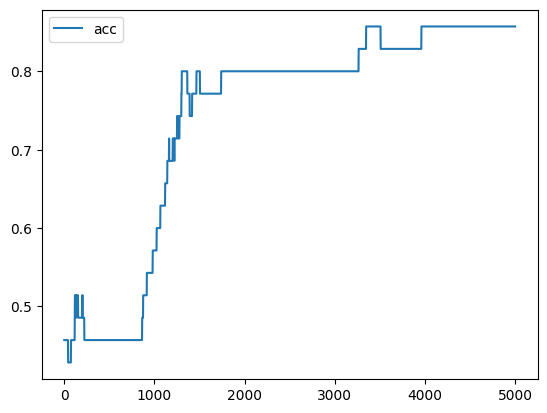

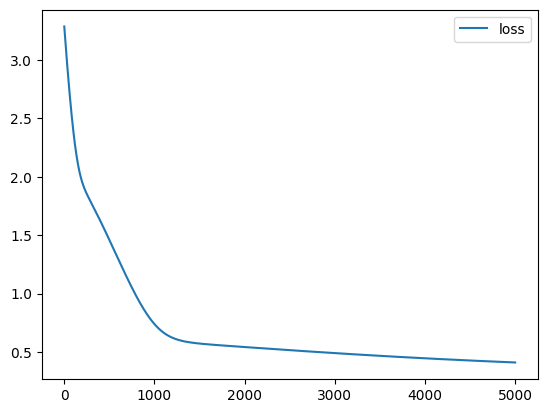

In [9]:
DataFrame({'acc': history.history['acc']}).plot()
DataFrame({'loss': history.history['loss']}).plot()

####[MLE-10]
Show weights after the training.

In [10]:
model.get_weights()

[array([[0.07038634],
        [0.15868439]], dtype=float32),
 array([-3.408086], dtype=float32)]

####[MLE-11]
Plot a chart using the final weights to show the result.

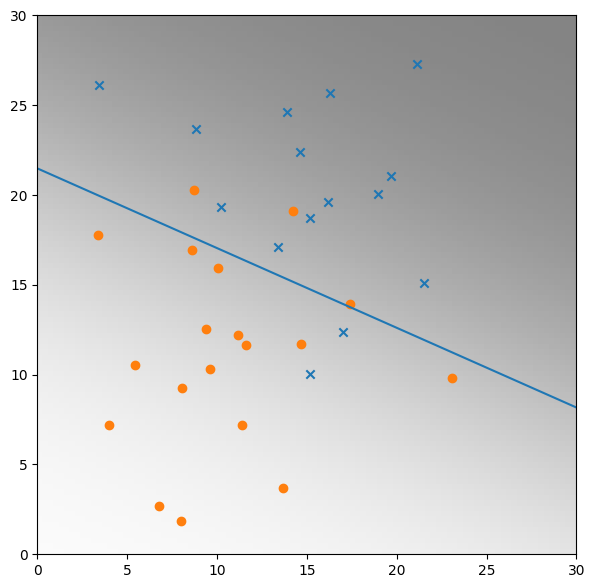

In [11]:
[[w1], [w2]], [b] = model.get_weights()

train_set0 = train_set[train_set['t']==0]
train_set1 = train_set[train_set['t']==1]

fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([0, 30])
subplot.set_xlim([0, 30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set0.x1, train_set0.x2, marker='o')

xs = np.linspace(0, 30, 10)
ys = - (w1*xs/w2 + b/w2)
subplot.plot(xs, ys)

field = [[(1 / (1 + np.exp(-(w1*x1 + w2*x2 + b))))
          for x1 in np.linspace(0, 30, 100)]
         for x2 in np.linspace(0, 30, 100)]
_ = subplot.imshow(field, origin='lower', extent=(0, 30, 0, 30),
                   vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.5)